In [12]:
import gensim
import torch
import pandas as pd
import pickle

In [13]:
filename='preprocessed_data.pkl'

In [14]:
data=pickle.load(open(filename,'rb')) ###open preprocessed data

In [15]:
len(data)

3208

In [17]:
data.head()

,Transcript,AD
0,um young boy getting cookie jar,1
1,uh bad shape uh thing,1
2,picture mother washing dish see,1
3,dish might get falled,1
4,fell fall get,1


In [52]:
Y= data.iloc[:,1].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [61]:
###Manually resolve the tabbed data errors

index = [826,827,828,829,835,840,842,848,849,851,854,856,870,875,882,990,997,1003,1008] 
for i in index:
    Y[i] = 0  ###replace value of selected indices of AD column with 0

idx = [1090,1172]
for i in idx:
    Y[i] = 1  ###replace value of selected indices of AD column with 1
Y = Y.astype(int)

In [65]:
import nltk
from nltk.tokenize import word_tokenize

In [73]:
def create_tokens(data):   ###utility function to create tokens
    sent_tokens =[]
    word_tokens = []
    for i in range(0,len(data)):
        word_tokens.append(word_tokenize(data[i]))
        sent_tokens.append(word_tokens[i])
    return sent_tokens

In [171]:
X=data['Transcript'].tolist()

In [172]:
X=create_tokens(X)  ###created tokens in list of list format to convert words into vectors using gensim 
X

[['um', 'young', 'boy', 'getting', 'cookie', 'jar'],
 ['uh', 'bad', 'shape', 'uh', 'thing'],
 ['picture', 'mother', 'washing', 'dish', 'see'],
 ['dish', 'might', 'get', 'falled'],
 ['fell', 'fall', 'get'],
 ['picture', 'kitchen', 'window'],
 ['curtain', 'uh', 'distinct'],
 ['water', 'flow', 'still', 'flowing'],
 ['young', 'boy', 'uh', 'going', 'cookie', 'jar'],
 ['lit', 'girl', 'young', 'girl'],
 ['saying', 'boy', 'hard'],
 ['hardly', 'hard', 'tell', 'anymore'],
 ['uh', 'c', 'cookie', 'jar'],
 ['stool', 'already', 'starting', 'fall'],
 ['water', 'sink', 'uh', 'ev', 'overflowing', 'sink'],
 ['hm', 'know', 'hickey'],
 ['whether', 'said'],
 ['uh', 'like', 'uh', 'wife', 'g', 'mean', 'uh', 'mother', 'near', 'girl'],
 ['uh', 'w', 'uh', 'h', 'uh'],
 ['oh', 'uh', 'think'],
 ['uh', 'trying', 'wipe', 'uh', 'wipe', 'dish'],
 ['oh', 'stop', 'water', 'going'],
 ['cookie', 'jar'],
 ['lid', 'cookie', 'jar'],
 ['boy', 'come', 'floor'],
 ['girl'],
 ['know', 'much', 'girl'],
 ['anyway', 'uh', 'housewife

# CREATE WORD2VEC 

In [173]:
from gensim.models import Word2Vec

In [174]:
word_vectors = Word2Vec(X, window=3, min_count = 1, size = 100, sg= 0) ##training the word2vec model on our transcript data 
                                                                       ##using CBOW model. Dimension of each token is 100
                                                                       ##CBOW is faster to train than Skip gram model

In [175]:
w1="jar"   ##similar words of jar in the dataset
word_vectors.wv.most_similar(w1) 

C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('g', 0.9990764260292053),
 ('boy', 0.9990421533584595),
 ('uh', 0.9990386366844177),
 ('cookie', 0.9989724159240723),
 ('one', 0.9988840818405151),
 ('stool', 0.9988771677017212),
 ('um', 0.9988239407539368),
 ('going', 0.9987986087799072),
 ('cooky', 0.9986841678619385),
 ('water', 0.9986766576766968)]

In [176]:
word_vectors['cookie'] ##vector for a given word

C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.06054812, -0.01276351,  0.0620679 ,  0.10124835,  0.0165293 ,
        0.07961644, -0.17423537,  0.13149887, -0.19606861,  0.01518378,
       -0.07238829, -0.05330055, -0.05952241,  0.04145846, -0.04303167,
        0.03802986, -0.1746401 , -0.01008194,  0.19297999,  0.11853449,
       -0.08824731, -0.08051681,  0.13529819, -0.00592044, -0.09217573,
       -0.09914745, -0.10220019, -0.03395615,  0.00816889, -0.17744035,
        0.16402628,  0.0810981 ,  0.10830985,  0.14131775,  0.06049389,
       -0.02371478,  0.09052017, -0.15568522, -0.14658007,  0.0133276 ,
        0.06810236,  0.05872837,  0.0124694 ,  0.1951295 ,  0.03471061,
        0.00933709,  0.00883019,  0.04114736,  0.2208771 ,  0.03233456,
       -0.16411912,  0.22633703,  0.02009838, -0.10188223,  0.02025134,
        0.15667072, -0.0753269 ,  0.05616651, -0.06184306,  0.10218108,
        0.06752671, -0.02802037, -0.21878016, -0.02075325,  0.00838195,
       -0.07657552, -0.11244361, -0.10828386, -0.03332884,  0.10

In [177]:
word_vectors.wv.similarity("girl",'boy') ###similarity between girl and boy

C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.9988283

In [221]:
word_vectors.wv.similar_by_word('kitchen')

C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('uh', 0.9990243911743164),
 ('g', 0.9989117383956909),
 ('stool', 0.9988784193992615),
 ('um', 0.9988363981246948),
 ('boy', 0.9987367391586304),
 ('water', 0.9987221956253052),
 ('r', 0.998710036277771),
 ('little', 0.9987078905105591),
 ('like', 0.9987038373947144),
 ('going', 0.9986811876296997)]

In [179]:
word_vectors.save('word_vectors.bin') ###save the word vectors for future use

In [180]:
len(word_vectors.wv.vocab) ##number of words in the vocabulary

870

# VISUALIZE WORD EMBEDDINGS 

In [181]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [223]:
def visualize_word_embeddings(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]


    close_words = model.similar_by_word(word)  ###get words similar to the desired words
    
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)  ###TSNE reduces the dimension from 100 to 2

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(5,5))
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00001, x_coords.max()+0.00001)
    plt.ylim(y_coords.min()+0.00001, y_coords.max()+0.00001)
    plt.show()

C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] =

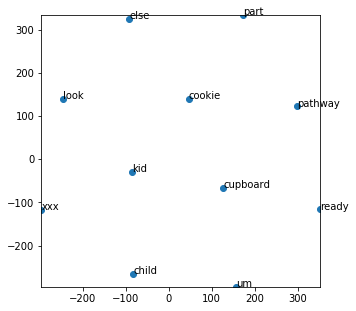

In [224]:
visualize_word_embeddings(word_vectors, 'pathway') ###plot similar words to mother in the dataset


C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


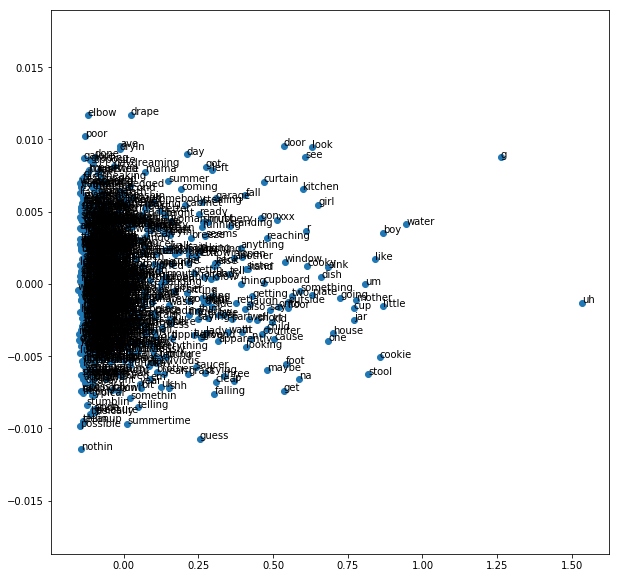

In [220]:
from sklearn.decomposition import PCA
plt.figure(figsize=(10,10))
X = word_vectors[word_vectors.wv.vocab]  ###plot all the words in the dataset
pca = PCA(n_components=2)   
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(word_vectors.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()    ###plot show that mostly words are similar in context and that's true as the transcripts are the description
              ###of the few selected scene. Hence, we can say that our trained word2vec model is working fine